#Machine Learning in Python
##Linear Regression
###with one variable
In this first part, I will implement linear regression with one variable to predict profits for a food truck.  Our data contains profits and populations from various cities.

I will use numpy and matplotlib for this exercise, so import them:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

###load the data
I use the numpy function loadtxt to load a comma-separated text file containing the data.  I print out some size information so we know what the shape of the data is.

In [2]:
X,Y = np.loadtxt("ex1data1.txt",comments="#",delimiter=",",unpack=True)
print(X.shape,X.ndim,X.size,X.dtype,X.itemsize, type(X))
print X[2]
print(Y.shape)

((97L,), 1, 97, dtype('float64'), 8, <type 'numpy.ndarray'>)
8.5186
(97L,)


###plot the data
Before starting on any task, it is often useful to understand the data by visualizing it.  Here, I use a scatter plot, sine it has only two properties to plot (profit and population)

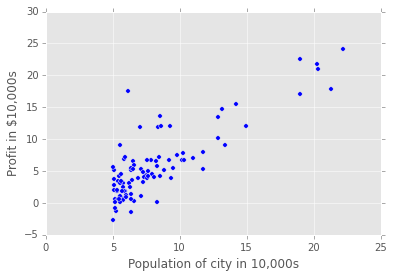

In [3]:
plt.scatter(X,Y)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

###set up the input matrix
Create an vector of ones and append it to the **X** matrix to account for the intercept term.  I then display the first five values in our new matrix, **Xn**

In [4]:
TheOnes = np.ones(X.shape)
Xn = np.column_stack((TheOnes,X))
print Xn.shape
print(Xn[0:5,:])

(97L, 2L)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]]


###define theta and gradient descent parameters
Initialize $\theta$ to zeros

In [5]:
Theta = np.zeros((Xn.shape[1],))
#print Theta.shape
iterations = 1500
alpha = 0.01

###define our cost function
I used the squared error for the cost function. Defined as:

$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$

where the hypothesis $h_\theta(x)$ is given by the linear model

$h_\theta(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}$


In [6]:
def computeCost(x,y,theta):
    m=y.size
    h=np.dot(x,theta)
    #I use the squared error for the cost function
    J=sum((h-y)**2)/(2*m)
    return J

In [7]:
print "Initial cost=", computeCost(Xn,Y,Theta)

Initial cost= 32.0727338775


### batch gradient descent

In batch gradient descent, each iteration performs the update

$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$)


In [8]:
def gradientDescent(x,y,theta,alpha,iterations):
    m=y.size
    #print theta.size
    thetaHistory = np.zeros((theta.size,iterations))
    #print thetaHistory.shape()
    JHistory = np.zeros((iterations,))
    for n in range(0,iterations):
        h=np.dot(x,theta)
        tempTheta=np.zeros(theta.shape)
        for t in range(0,theta.shape[0]):
            #update each theta
            #tempTheta[t] = theta[t] - alpha * partial derivative with resp. to theta[t] of the cost function
            tempTheta[t]=theta[t]-np.dot(alpha,np.dot(x[:,t].transpose(),(h-y)/m))
        theta = tempTheta
        thetaHistory[:,n] = theta;
        JHistory[n] = computeCost(x,y,theta)
    return theta, JHistory, thetaHistory
        

In [9]:
Theta = np.zeros((Xn.shape[1],))
ThetaNew,jHist,tHist = gradientDescent(Xn,Y,Theta,alpha,iterations)

[-3.63029144  1.16636235]
(1500L,)


<function matplotlib.pyplot.show>

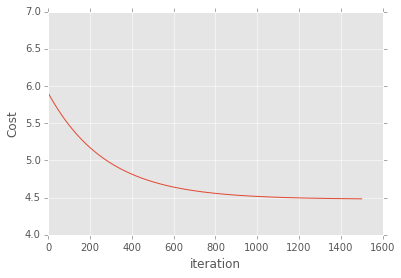

In [10]:
print ThetaNew
print jHist.shape
plt.plot(jHist)
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.show

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

C:\Users\btq\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Users\btq\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


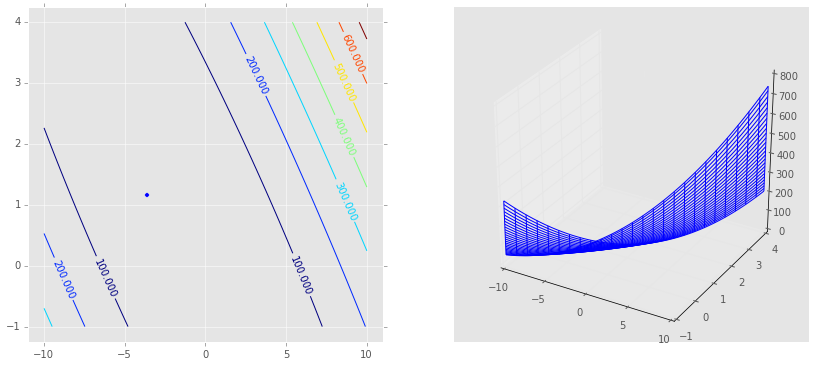

In [12]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size));

# Fill out J_vals
for i in range(0,theta0_vals.size):
    for j in range(0,theta1_vals.size):
        t = [theta0_vals[i], theta1_vals[j]];    
        J_vals[i,j] = computeCost(Xn, Y, t)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
cs = ax.contour(theta0_vals,theta1_vals,J_vals)
ax.clabel(cs, inline=1, fontsize=10)
ax.scatter(tHist[0,-1],tHist[1,-1])
ax = fig.add_subplot(1,2,2,projection='3d')
p = ax.plot_wireframe(theta0_vals,theta1_vals,J_vals,rstride=4,cstride=4)

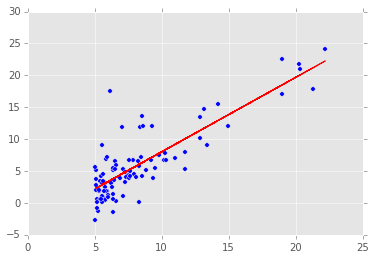

In [13]:
plt.scatter(X,Y)
plt.plot(X,np.dot(Xn,ThetaNew),'r')
plt.show()

In [14]:
Theta = np.zeros((2,))
ThetaNew,jHist,tHist = gradientDescent(Xn,Y,Theta,alpha,iterations)
print ThetaNew

[-3.63029144  1.16636235]


# Normal Equation
the closed-form solution to linear regression is
$\theta = (X^{T}X)^{-1}X^{T}y$

no feature scaling is required and we get an exact solution in one calculation. Not advisable to use it with large datasets as memory requirements are greater than the iterative approach in gradient descent.

In [15]:
ThetaNE = np.dot(np.dot(np.linalg.pinv(np.dot(Xn.transpose(),Xn)),Xn.transpose()),Y)

[-3.89578088  1.19303364]


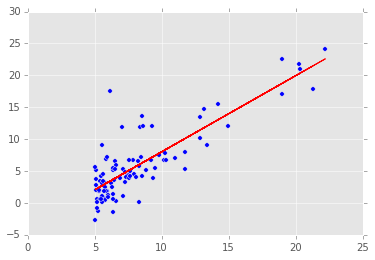

In [16]:
print ThetaNE
plt.scatter(X,Y)
plt.plot(X,np.dot(Xn,ThetaNE),'r')
plt.show()